
# 小地域の収入推定

```Data```フォルダには、小地域の収入データ(```income_district.csv```)と国勢調査の小地域集計データが格納されています。

国勢調査の小地域集計データ（人口構成、労働力構成、住宅形態など）から、その地域の収入を推定することが考えられます。推定のための機械学習・深層学習モデルを構築しなさい。


- データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい
- データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい
- モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい


In [35]:
import pandas as pd
import numpy as np

In [36]:
#データの読み込み
income = pd.read_csv('Data/income_district.csv')
industry = pd.read_csv('Data/h27_indusry_df.csv')

In [37]:
#データの確認
display(income.head())
display(industry.head())

,area_code,income_mean
0,13228,480.984419
1,43514,439.775281
2,23237,487.507769
3,18208,505.495103
4,12238,385.423846


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_agriculture_forestry_male,agriculture_male,B_fishing_male,...,K_real_estate_female,L_academic_female,M_accommodation_female,N_entertainment_female,O_education_female,P_health_care_female,Q_service_female,R_other_service_female,S_public_services_female,T_other_female
0,43101,NaN,1,熊本県,熊本市中央区,NaN,NaN,306,264,6,...,1127,1335,3898,2150,3058,9432,275,2841,1391,1989
1,43101,10.0,2,熊本県,熊本市中央区,安政町,NaN,-,-,-,...,3,-,4,2,-,2,-,2,-,1
2,43101,20.0,2,熊本県,熊本市中央区,井川淵町,NaN,-,-,-,...,2,1,4,2,5,6,-,2,2,1
3,43101,31.0,2,熊本県,熊本市中央区,出水,NaN,33,32,-,...,75,99,223,132,240,777,20,201,93,108
4,43101,3101.0,3,熊本県,熊本市中央区,出水,１丁目,-,-,-,...,11,10,21,15,21,62,2,19,10,10


In [39]:
# 欠損値が '-' で表されている場合、それを NaN に変換
industry.replace('-', np.nan, inplace=True)
display(industry.head())

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,A_agriculture_forestry_male,agriculture_male,B_fishing_male,...,K_real_estate_female,L_academic_female,M_accommodation_female,N_entertainment_female,O_education_female,P_health_care_female,Q_service_female,R_other_service_female,S_public_services_female,T_other_female
0,43101,NaN,1,熊本県,熊本市中央区,NaN,NaN,306,264,6,...,1127,1335,3898,2150,3058,9432,275,2841,1391,1989
1,43101,10.0,2,熊本県,熊本市中央区,安政町,NaN,NaN,NaN,NaN,...,3,NaN,4,2,NaN,2,NaN,2,NaN,1
2,43101,20.0,2,熊本県,熊本市中央区,井川淵町,NaN,NaN,NaN,NaN,...,2,1,4,2,5,6,NaN,2,2,1
3,43101,31.0,2,熊本県,熊本市中央区,出水,NaN,33,32,NaN,...,75,99,223,132,240,777,20,201,93,108
4,43101,3101.0,3,熊本県,熊本市中央区,出水,１丁目,NaN,NaN,NaN,...,11,10,21,15,21,62,2,19,10,10


In [41]:
# 不要な列の削除
industry1 = industry.drop(columns=['district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name'])
industry1


,district_id,A_agriculture_forestry_male,agriculture_male,B_fishing_male,C_mining_male,D_construction_male,E_manufacturing_male,F_Electricity_male,G_information_male,H_transport_male,...,K_real_estate_female,L_academic_female,M_accommodation_female,N_entertainment_female,O_education_female,P_health_care_female,Q_service_female,R_other_service_female,S_public_services_female,T_other_female
0,43101,306,264,6,2,3296,3683,419,1636,1773,...,1127,1335,3898,2150,3058,9432,275,2841,1391,1989
1,43101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,...,3,NaN,4,2,NaN,2,NaN,2,NaN,1
2,43101,NaN,NaN,NaN,NaN,1,7,NaN,5,2,...,2,1,4,2,5,6,NaN,2,2,1
3,43101,33,32,NaN,NaN,350,270,31,123,131,...,75,99,223,132,240,777,20,201,93,108
4,43101,NaN,NaN,NaN,NaN,11,17,1,18,6,...,11,10,21,15,21,62,2,19,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251253,24562,222,198,8,4,517,466,15,11,175,...,26,22,178,79,110,716,36,77,49,13
251254,24562,30,29,NaN,NaN,52,45,4,1,24,...,NaN,NaN,10,6,16,61,1,7,4,3
251255,24562,42,37,NaN,1,99,85,1,1,29,...,3,NaN,35,15,21,98,7,13,8,1
251256,24562,112,104,5,1,162,127,5,1,44,...,10,11,47,21,31,278,6,21,14,5


In [44]:
# industry1とincomeをdistrict_idで結合
df = industry1.merge(income, left_on='district_id', right_on='area_code', how='outer')
df = df.drop(columns=["district_id"])
df

,A_agriculture_forestry_male,agriculture_male,B_fishing_male,C_mining_male,D_construction_male,E_manufacturing_male,F_Electricity_male,G_information_male,H_transport_male,I_wholesale_male,...,M_accommodation_female,N_entertainment_female,O_education_female,P_health_care_female,Q_service_female,R_other_service_female,S_public_services_female,T_other_female,area_code,income_mean
0,306,264,6,2,3296,3683,419,1636,1773,6676,...,3898,2150,3058,9432,275,2841,1391,1989,43101.0,442.482206
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,3,...,4,2,NaN,2,NaN,2,NaN,1,43101.0,442.482206
2,NaN,NaN,NaN,NaN,1,7,NaN,5,2,7,...,4,2,5,6,NaN,2,2,1,43101.0,442.482206
3,33,32,NaN,NaN,350,270,31,123,131,594,...,223,132,240,777,20,201,93,108,43101.0,442.482206
4,NaN,NaN,NaN,NaN,11,17,1,18,6,64,...,21,15,21,62,2,19,10,10,43101.0,442.482206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14130.0,554.180015
251261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22130.0,498.185902
251262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14150.0,489.447429
251263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40130.0,425.679923


In [50]:
pip install pycaret


     ---------------------------------------- 0.0/163.8 kB ? eta -:--:--
     ----------------------------------- -- 153.6/163.8 kB 4.6 MB/s eta 0:00:01
     -------------------------------------- 163.8/163.8 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/51.7 kB ? eta -:--:--
     ---------------------------------------- 51.7/51.7 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/486.1 kB ? eta -:--:--
   --------------------------------------- 486.1/486.1 kB 10.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/106.8 kB ? eta -:--:--
   ---------------------------------------- 106.8/106.8 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/21.8 MB ? eta -:--:--
   -- ------------------------------------- 1.2/21.8 MB 24.8 MB/s eta 0:00:01
   --- ------------------------------------ 2.0/21.8 MB 25.2 M

In [51]:
from pycaret.regression import *
#様々な機械学習モデルを実装できるpycaretを使ってみる

In [59]:
# 欠損値がある行を削除
df = df.dropna(subset=['income_mean'])

#データの前処理を行う
#従属変数をincome_meanとし、回帰モデルを作成する
#228269行、64列のデータ
#データの70%が訓練用、30%がテスト用に分けられる
reg = setup(data=df, target='income_mean', session_id=123,  ignore_features=['area_code'])

,Description,Value
0,Session id,123
1,Target,income_mean
2,Target type,Regression
3,Original data shape,"(228269, 44)"
4,Transformed data shape,"(228269, 64)"
5,Transformed train set shape,"(159788, 64)"
6,Transformed test set shape,"(68481, 64)"
7,Ignore features,1
8,Categorical features,42
9,Rows with missing values,97.3%


In [60]:
#モデルの比較
#lightgbmが誤差が少なく、評価が一番高い
#次点でランダムフォレストの評価が高い
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,35.7394,2129.4150,46.1443,0.3385,0.1033,0.0810,4.3190
rf,Random Forest Regressor,35.8613,2161.9605,46.4957,0.3284,0.1041,0.0813,91.8500
et,Extra Trees Regressor,35.9389,2171.3470,46.5971,0.3255,0.1044,0.0815,90.4440
gbr,Gradient Boosting Regressor,37.2793,2316.3459,48.1268,0.2805,0.1076,0.0846,32.3330
br,Bayesian Ridge,38.1941,2439.9709,49.3945,0.2420,0.1103,0.0867,3.4930
ridge,Ridge Regression,38.1960,2440.4731,49.3996,0.2419,0.1103,0.0867,2.7180
lr,Linear Regression,38.1968,2440.6450,49.4013,0.2418,0.1103,0.0867,5.5050
en,Elastic Net,38.2351,2442.7376,49.4225,0.2412,0.1104,0.0868,12.6960
llar,Lasso Least Angle Regression,38.2468,2443.7333,49.4326,0.2409,0.1104,0.0868,2.3650
lasso,Lasso Regression,38.2468,2443.7290,49.4325,0.2409,0.1104,0.0868,12.1200


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=123)

In [61]:
# モデルを作成
model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,35.8877,2138.4475,46.2434,0.3420,0.1034,0.0813
1,35.9788,2171.2221,46.5964,0.3263,0.1039,0.0814
2,35.8977,2130.8193,46.1608,0.3392,0.1034,0.0813
3,35.7612,2123.7581,46.0843,0.3356,0.1031,0.0811
4,35.4541,2076.8740,45.5727,0.3440,0.1018,0.0801
5,36.2431,2190.0794,46.7983,0.3414,0.1044,0.0819
6,35.6629,2121.3916,46.0586,0.3364,0.1035,0.0812
7,35.6854,2136.8353,46.2259,0.3346,0.1036,0.0810
8,35.3727,2100.4572,45.8307,0.3435,0.1030,0.0804


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

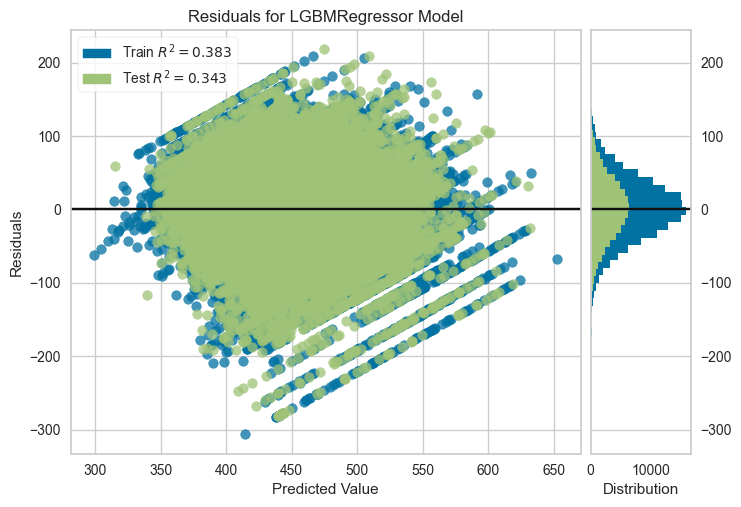

In [63]:
#残差モデルのプロット
#ヒストグラムが正規分布の形をしているので、残差と予測値が相関しないよいモデルである
plot_model(model)

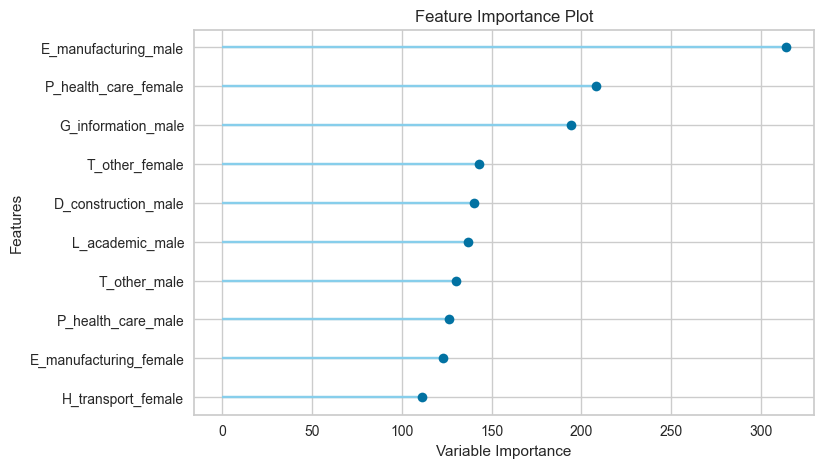

In [64]:
#特徴量の重要度を可視化
#製造業で働いている男性の数が最も重要である
#次点で医療関連業で働いている女性の数が重要である
plot_model(model, plot = 'feature')

In [66]:
# カラムのデータ型を確認
print(df['E_manufacturing_male'].dtype)
print(df['income_mean'].dtype)


object
float64


In [67]:
# データ型をfloatに変換
df['E_manufacturing_male'] = pd.to_numeric(df['E_manufacturing_male'], errors='coerce')

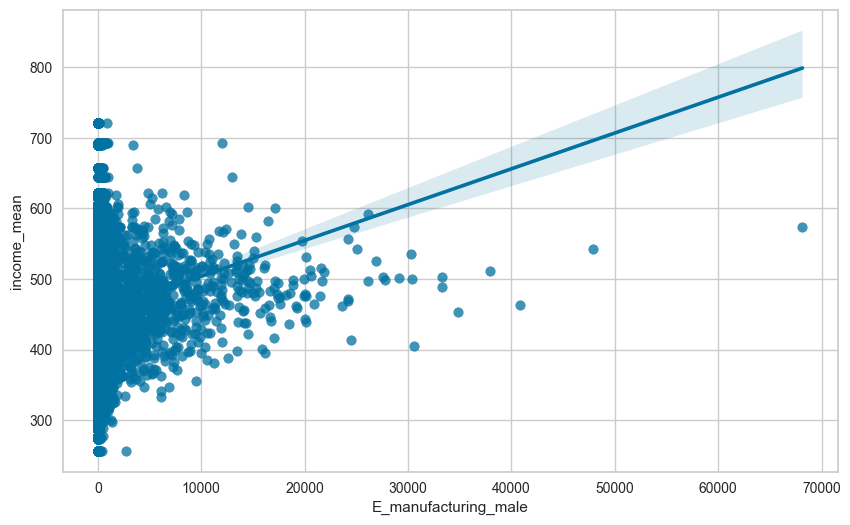

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

#散布図と回帰直線の作成
#x=製造業で働いている男性の数、y=収入の平均値
#回帰直線はだいぶ上向きに傾いているが、プロットを見る限りはあまり関係がなさそうに見える
plt.figure(figsize=(10, 6))
sns.regplot(x='E_manufacturing_male', y='income_mean', data=df, scatter_kws={'alpha':0.5})
plt.scatter(df['E_manufacturing_male'], df['income_mean'], alpha=0.5)
plt.xlabel('E_manufacturing_male')
plt.ylabel('income_mean')
plt.grid(True)
plt.show()


まとめ

今回は産業別構成人口を独立変数、収入の平均値を従属変数にして回帰モデルを作成した。その結果、LightGBMが最もよい精度で予測でき、決定係数は30%程となった。しかし、産業別構成人口のみで収入の3割が説明できるとは考えにくい。決定係数が高くなった原因としては特徴量が64つとかなり多くなったからではないだろうか。今後は特徴量を取捨選択した上で、年齢構成や労働人口なども加味したモデルをつくれるとよりよい精度のモデルができるかと思われる。